In [1]:
import warnings  
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from env import get_db_url
import acquire

pd.set_option("display.max_rows", 2500)


I have some questions for you that I need to be answered before the board meeting Thursday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?


In [2]:
df = acquire.get_curriculum_data()

In [3]:
df.program_id.value_counts()

2.0    713365
3.0    103412
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [4]:
df[df.program_id==4.0]

date      time                                         path  \
31627  2018-03-22  19:01:49                                            /   
31628  2018-03-22  19:01:54                             content/html-css   
31629  2018-03-22  19:01:54  content/html-css/gitbook/images/favicon.ico   
31630  2018-03-22  19:02:47                             content/html-css   
31631  2018-03-22  19:02:52           content/html-css/introduction.html   

       user_id             ip    name  start_date    end_date  program_id  
31627      152  207.68.209.17  Apollo  2015-03-30  2015-07-29         4.0  
31628      152  207.68.209.17  Apollo  2015-03-30  2015-07-29         4.0  
31629      152  207.68.209.17  Apollo  2015-03-30  2015-07-29         4.0  
31630      152  207.68.209.17  Apollo  2015-03-30  2015-07-29         4.0  
31631      152  207.68.209.17  Apollo  2015-03-30  2015-07-29         4.0

In [5]:
df.head()

date      time                                 path  user_id  \
0  2018-01-26  09:55:03                                    /        1   
1  2018-01-26  09:56:02                              java-ii        1   
2  2018-01-26  09:56:05  java-ii/object-oriented-programming        1   
3  2018-01-26  09:56:06   slides/object_oriented_programming        1   
4  2018-01-26  09:56:24            javascript-i/conditionals        2   

             ip     name  start_date    end_date  program_id  
0  97.105.19.61  Hampton  2015-09-22  2016-02-06         1.0  
1  97.105.19.61  Hampton  2015-09-22  2016-02-06         1.0  
2  97.105.19.61  Hampton  2015-09-22  2016-02-06         1.0  
3  97.105.19.61  Hampton  2015-09-22  2016-02-06         1.0  
4  97.105.19.61    Teddy  2018-01-08  2018-05-17         2.0

In [6]:
df.shape

(900223, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   ip          900223 non-null  object 
 5   name        847330 non-null  object 
 6   start_date  847330 non-null  object 
 7   end_date    847330 non-null  object 
 8   program_id  847330 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 68.7+ MB


In [8]:
df['date_time'] = df['date'] + ' ' + df['time']

In [9]:
# convert dates to date time type
df['date_time'] = pd.to_datetime(df['date_time'])
df['start_date'] = pd.to_datetime(df['start_date']).dt.date
df['end_date'] = pd.to_datetime(df['end_date']).dt.date

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        900223 non-null  object        
 1   time        900223 non-null  object        
 2   path        900222 non-null  object        
 3   user_id     900223 non-null  int64         
 4   ip          900223 non-null  object        
 5   name        847330 non-null  object        
 6   start_date  847330 non-null  object        
 7   end_date    847330 non-null  object        
 8   program_id  847330 non-null  float64       
 9   date_time   900223 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 75.5+ MB


In [11]:
df = df.set_index('date_time')
df.head()

date      time  \
date_time                                   
2018-01-26 09:55:03  2018-01-26  09:55:03   
2018-01-26 09:56:02  2018-01-26  09:56:02   
2018-01-26 09:56:05  2018-01-26  09:56:05   
2018-01-26 09:56:06  2018-01-26  09:56:06   
2018-01-26 09:56:24  2018-01-26  09:56:24   

                                                    path  user_id  \
date_time                                                           
2018-01-26 09:55:03                                    /        1   
2018-01-26 09:56:02                              java-ii        1   
2018-01-26 09:56:05  java-ii/object-oriented-programming        1   
2018-01-26 09:56:06   slides/object_oriented_programming        1   
2018-01-26 09:56:24            javascript-i/conditionals        2   

                               ip     name  start_date    end_date  program_id  
date_time                                                                       
2018-01-26 09:55:03  97.105.19.61  Hampton  2015-09-22  2016-02-06         1.0  
2018-01-26 09:56:02  97.105.19.61  Hampton  2015-09-22  2016-02-06         1.0  
2018-01-26 09:56:05  97.105.19.61  Hampton  2015-09-22  2016-02-06         1.0  
2018-01-26 09:56:06  97.105.19.61  Hampton  2015-09-22  2016-02-06         1.0  
2018-01-26 09:56:24  97.105.19.61    Teddy  2018-01-08  2018-05-17         2.0

In [12]:
# converts 1,2,4 to web and 4 to ds
df.loc[df['program_id'] == 1.0, 'program_id'] = 'Web Development'
df.loc[df['program_id'] == 2.0, 'program_id'] = 'Web Development'
df.loc[df['program_id'] == 4.0, 'program_id'] = 'Web Development'         
df.loc[df['program_id'] == 3.0, 'program_id'] = 'Data Science'

In [13]:
df.describe(include='all').T

count unique              top    freq        mean         std  \
date          900223   1182       2021-03-19    3104         NaN         NaN   
time          900223  73167         09:03:00      81         NaN         NaN   
path          900222   2313                /   50313         NaN         NaN   
user_id     900223.0    NaN              NaN     NaN  458.825707  249.296767   
ip            900223   5531     97.105.19.58  284579         NaN         NaN   
name          847330     47            Staff   84031         NaN         NaN   
start_date    847330     44       2014-02-04   92921         NaN         NaN   
end_date      847330     45       2014-02-04   84031         NaN         NaN   
program_id    847330      2  Web Development  743918         NaN         NaN   

            min    25%    50%    75%    max  
date        NaN    NaN    NaN    NaN    NaN  
time        NaN    NaN    NaN    NaN    NaN  
path        NaN    NaN    NaN    NaN    NaN  
user_id     1.0  269.0  475.0  660.0  981.0  
ip          NaN    NaN    NaN    NaN    NaN  
name        NaN    NaN    NaN    NaN    NaN  
start_date  NaN    NaN    NaN    NaN    NaN  
end_date    NaN    NaN    NaN    NaN    NaN  
program_id  NaN    NaN    NaN    NaN    NaN

In [14]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("-------------------------------")

date
2021-03-19    3104
2021-04-12    2446
2021-03-25    2369
2020-09-08    2304
2021-03-16    2298
2020-07-27    2275
2021-02-02    2257
2021-04-05    2236
2021-03-29    2230
2020-07-16    2196
2021-04-15    2192
2021-04-06    2184
2021-03-23    2171
2021-04-19    2156
2020-04-20    2144
2020-09-28    2133
2020-08-03    2117
2021-01-11    2046
2020-10-26    2039
2020-07-28    2031
2020-06-01    1992
2021-03-22    1977
2020-10-22    1976
2021-03-18    1975
2020-09-21    1966
2020-08-10    1944
2020-06-16    1939
2021-04-20    1930
2020-11-02    1919
2020-09-11    1917
2020-12-08    1893
2019-10-07    1879
2021-04-01    1874
2021-01-19    1874
2020-07-24    1852
2020-07-20    1848
2021-03-08    1846
2020-08-06    1843
2021-01-26    1838
2020-11-30    1835
2020-12-14    1825
2021-02-09    1825
2020-06-15    1824
2020-12-10    1814
2021-01-05    1814
2020-05-28    1810
2020-11-19    1797
2020-05-19    1790
2021-04-08    1790
2020-07-21    1785
2020-11-16    1779
2021-01-08    1773
2021-02

11     17913
64     16347
53     12329
314     7783
1       7404
495     6451
581     6434
428     5897
344     5460
248     5075
570     4584
315     4510
211     4227
423     3804
555     3687
545     3528
685     3522
524     3512
485     3268
671     3241
346     3182
566     3163
521     3052
595     3050
760     3019
764     2975
354     2965
823     2946
323     2933
419     2877
120     2870
794     2852
430     2811
599     2711
127     2687
613     2685
410     2650
531     2632
418     2598
546     2585
656     2570
437     2523
640     2472
186     2450
627     2439
433     2428
748     2399
608     2387
834     2379
277     2367
736     2358
460     2322
347     2318
668     2316
490     2312
480     2303
636     2267
20      2263
325     2248
363     2248
612     2238
662     2235
604     2221
698     2211
457     2188
337     2183
648     2158
274     2146
614     2146
491     2143
716     2136
475     2136
416     2121
761     2120
330     2112
666     2103
368     2085

In [15]:
df.isna().sum()

date              0
time              0
path              1
user_id           0
ip                0
name          52893
start_date    52893
end_date      52893
program_id    52893
dtype: int64

In [16]:
len(df[df.name=='NaN'])

0

**Notes:** 
- What is path relevent to? -why only 1 null?
- Are the 52,893 rows with no name, start_date, end_date, program_id just nulls, or could that be something else?


In [17]:
df[df.name.isna()]

date      time  \
date_time                                   
2018-01-26 16:46:16  2018-01-26  16:46:16   
2018-01-26 16:46:24  2018-01-26  16:46:24   
2018-01-26 17:54:24  2018-01-26  17:54:24   
2018-01-26 18:32:03  2018-01-26  18:32:03   
2018-01-26 18:32:17  2018-01-26  18:32:17   
...                         ...       ...   
2021-04-21 12:49:00  2021-04-21  12:49:00   
2021-04-21 12:49:02  2021-04-21  12:49:02   
2021-04-21 12:51:27  2021-04-21  12:51:27   
2021-04-21 12:52:37  2021-04-21  12:52:37   
2021-04-21 12:56:26  2021-04-21  12:56:26   

                                                      path  user_id  \
date_time                                                             
2018-01-26 16:46:16                                      /       48   
2018-01-26 16:46:24  spring/extra-features/form-validation       48   
2018-01-26 17:54:24                                      /       48   
2018-01-26 18:32:03                                      /       48   
2018-01-26 18:32:17              mysql/relationships/joins       48   
...                                                    ...      ...   
2021-04-21 12:49:00                          javascript-ii      717   
2021-04-21 12:49:02                      javascript-ii/es6      717   
2021-04-21 12:51:27        javascript-ii/map-filter-reduce      717   
2021-04-21 12:52:37                 javascript-ii/promises      717   
2021-04-21 12:56:26              javascript-ii/RESTful-api      717   

                                 ip name start_date end_date program_id  
date_time                                                                
2018-01-26 16:46:16    97.105.19.61  NaN        NaT      NaT        NaN  
2018-01-26 16:46:24    97.105.19.61  NaN        NaT      NaT        NaN  
2018-01-26 17:54:24    97.105.19.61  NaN        NaT      NaT        NaN  
2018-01-26 18:32:03    97.105.19.61  NaN        NaT      NaT        NaN  
2018-01-26 18:32:17    97.105.19.61  NaN        NaT      NaT        NaN  
...                             ...  ...        ...      ...        ...  
2021-04-21 12:49:00  136.50.102.126  NaN        NaT      NaT        NaN  
2021-04-21 12:49:02  136.50.102.126  NaN        NaT      NaT        NaN  
2021-04-21 12:51:27  136.50.102.126  NaN        NaT      NaT        NaN  
2021-04-21 12:52:37  136.50.102.126  NaN        NaT      NaT        NaN  
2021-04-21 12:56:26  136.50.102.126  NaN        NaT      NaT        NaN  

[52893 rows x 9 columns]

In [18]:
df[df.name.isna()].user_id.value_counts()

354    2965
736    2358
363    2248
716    2136
368    2085
723    1692
349    1663
720    1646
48     1581
727    1573
362    1561
346    1513
355    1436
721    1433
719    1420
353    1398
714    1336
717    1317
715    1159
367    1141
728    1134
366    1095
713     977
351     886
372     867
61      816
352     773
718     753
111     753
361     732
810     709
364     637
357     605
731     528
359     519
722     515
724     477
429     471
58      462
729     461
403     461
726     456
369     448
782     370
88      334
365     331
725     308
79      276
360     251
814     187
86      177
54      146
358     138
375     132
406      90
350      87
73       84
74       80
166      77
317      73
744      69
247      66
100      59
544      55
78       53
103      46
815      46
59       42
64       25
63       23
213      21
356      21
137      10
644       6
663       4
62        4
89        3
176       3
Name: user_id, dtype: int64

In [19]:
df[df.name.isna()].value_counts()

Series([], dtype: int64)

In [20]:
df.user_id.value_counts(ascending=False)

11     17913
64     16347
53     12329
314     7783
1       7404
495     6451
581     6434
428     5897
344     5460
248     5075
570     4584
315     4510
211     4227
423     3804
555     3687
545     3528
685     3522
524     3512
485     3268
671     3241
346     3182
566     3163
521     3052
595     3050
760     3019
764     2975
354     2965
823     2946
323     2933
419     2877
120     2870
794     2852
430     2811
599     2711
127     2687
613     2685
410     2650
531     2632
418     2598
546     2585
656     2570
437     2523
640     2472
186     2450
627     2439
433     2428
748     2399
608     2387
834     2379
277     2367
736     2358
460     2322
347     2318
668     2316
490     2312
480     2303
636     2267
20      2263
325     2248
363     2248
612     2238
662     2235
604     2221
698     2211
457     2188
337     2183
648     2158
274     2146
614     2146
491     2143
716     2136
475     2136
416     2121
761     2120
330     2112
666     2103
368     2085

In [21]:
df[df.user_id==48]

date      time  \
date_time                                   
2018-01-26 16:46:16  2018-01-26  16:46:16   
2018-01-26 16:46:24  2018-01-26  16:46:24   
2018-01-26 17:54:24  2018-01-26  17:54:24   
2018-01-26 18:32:03  2018-01-26  18:32:03   
2018-01-26 18:32:17  2018-01-26  18:32:17   
2018-01-26 18:32:33  2018-01-26  18:32:33   
2018-01-26 18:32:37  2018-01-26  18:32:37   
2018-01-26 18:32:43  2018-01-26  18:32:43   
2018-01-26 18:32:47  2018-01-26  18:32:47   
2018-01-26 18:33:07  2018-01-26  18:33:07   
2018-01-26 18:33:13  2018-01-26  18:33:13   
2018-01-26 18:34:02  2018-01-26  18:34:02   
2018-01-26 18:34:33  2018-01-26  18:34:33   
2018-01-26 18:38:21  2018-01-26  18:38:21   
2018-01-26 18:39:30  2018-01-26  18:39:30   
2018-01-26 18:39:37  2018-01-26  18:39:37   
2018-01-26 18:39:40  2018-01-26  18:39:40   
2018-01-26 18:39:45  2018-01-26  18:39:45   
2018-01-26 18:39:49  2018-01-26  18:39:49   
2018-01-26 18:39:55  2018-01-26  18:39:55   
2018-01-26 18:40:17  2018-01-26  18:40:17   
2018-01-26 18:41:17  2018-01-26  18:41:17   
2018-01-26 19:40:30  2018-01-26  19:40:30   
2018-01-26 19:41:05  2018-01-26  19:41:05   
2018-01-26 19:41:14  2018-01-26  19:41:14   
2018-01-26 19:41:47  2018-01-26  19:41:47   
2018-01-26 19:44:01  2018-01-26  19:44:01   
2018-01-26 19:48:12  2018-01-26  19:48:12   
2018-01-26 19:48:24  2018-01-26  19:48:24   
2018-01-26 19:48:29  2018-01-26  19:48:29   
2018-01-26 19:50:05  2018-01-26  19:50:05   
2018-01-26 19:50:11  2018-01-26  19:50:11   
2018-01-26 20:50:45  2018-01-26  20:50:45   
2018-01-26 21:07:46  2018-01-26  21:07:46   
2018-01-26 21:10:56  2018-01-26  21:10:56   
2018-01-26 22:30:30  2018-01-26  22:30:30   
2018-01-26 22:30:59  2018-01-26  22:30:59   
2018-01-26 23:29:09  2018-01-26  23:29:09   
2018-01-26 23:29:23  2018-01-26  23:29:23   
2018-01-29 04:34:10  2018-01-29  04:34:10   
2018-01-29 04:34:26  2018-01-29  04:34:26   
2018-01-29 04:39:35  2018-01-29  04:39:35   
2018-01-29 07:57:58  2018-01-29  07:57:58   
2018-01-29 07:58:02  2018-01-29  07:58:02   
2018-01-29 08:08:47  2018-01-29  08:08:47   
2018-01-29 08:10:38  2018-01-29  08:10:38   
2018-01-29 15:48:08  2018-01-29  15:48:08   
2018-01-30 15:43:47  2018-01-30  15:43:47   
2018-01-30 15:44:04  2018-01-30  15:44:04   
2018-01-30 15:44:08  2018-01-30  15:44:08   
2018-01-30 15:44:20  2018-01-30  15:44:20   
2018-01-30 15:44:23  2018-01-30  15:44:23   
2018-01-30 15:44:30  2018-01-30  15:44:30   
2018-01-30 17:40:33  2018-01-30  17:40:33   
2018-01-30 17:40:41  2018-01-30  17:40:41   
2018-01-30 18:31:43  2018-01-30  18:31:43   
2018-01-30 19:24:55  2018-01-30  19:24:55   
2018-01-30 19:24:56  2018-01-30  19:24:56   
2018-01-30 19:36:01  2018-01-30  19:36:01   
2018-01-30 19:36:39  2018-01-30  19:36:39   
2018-01-30 19:36:45  2018-01-30  19:36:45   
2018-01-30 19:36:46  2018-01-30  19:36:46   
2018-01-30 19:57:30  2018-01-30  19:57:30   
2018-01-30 19:57:32  2018-01-30  19:57:32   
2018-01-30 23:35:38  2018-01-30  23:35:38   
2018-01-30 23:35:57  2018-01-30  23:35:57   
2018-01-30 23:36:04  2018-01-30  23:36:04   
2018-01-30 23:37:07  2018-01-30  23:37:07   
2018-01-30 23:37:18  2018-01-30  23:37:18   
2018-01-30 23:38:09  2018-01-30  23:38:09   
2018-01-30 23:40:50  2018-01-30  23:40:50   
2018-01-30 23:45:40  2018-01-30  23:45:40   
2018-01-30 23:45:54  2018-01-30  23:45:54   
2018-01-31 02:43:58  2018-01-31  02:43:58   
2018-01-31 02:44:05  2018-01-31  02:44:05   
2018-01-31 02:44:07  2018-01-31  02:44:07   
2018-01-31 02:45:13  2018-01-31  02:45:13   
2018-01-31 02:45:15  2018-01-31  02:45:15   
2018-01-31 16:28:18  2018-01-31  16:28:18   
2018-01-31 16:31:20  2018-01-31  16:31:20   
2018-01-31 16:31:35  2018-01-31  16:31:35   
2018-01-31 16:32:19  2018-01-31  16:32:19   
2018-01-31 16:32:30  2018-01-31  16:32:30   
2018-01-31 16:33:32  2018-01-31  16:33:32   
2018-01-31 16:33:42  2018-01-31  16:33:42   
2018-01-31 16:53:01  2018-01-31  16:53:01   
2018-01-31 16:58:29  2018-01-31  16:58:29   
2018-01-31 17:02:55  2

In [22]:
df[(df.ip=='97.105.19.58')]

date      time                             path  \
date_time                                                                    
2018-07-16 07:51:57  2018-07-16  07:51:57           javascript-ii/promises   
2018-07-16 07:58:03  2018-07-16  07:58:03  javascript-ii/map-filter-reduce   
2018-07-16 07:59:50  2018-07-16  07:59:50           javascript-ii/promises   
2018-07-16 08:07:37  2018-07-16  08:07:37                       index.html   
2018-07-16 08:07:41  2018-07-16  08:07:41                    javascript-ii   
...                         ...       ...                              ...   
2020-03-23 15:10:09  2020-03-23  15:10:09                              toc   
2020-03-23 15:10:18  2020-03-23  15:10:18                              toc   
2020-03-23 15:20:39  2020-03-23  15:20:39                                /   
2020-03-23 15:24:54  2020-03-23  15:24:54                                /   
2020-03-23 16:07:31  2020-03-23  16:07:31                                /   

                     user_id            ip      name  start_date    end_date  \
date_time                                                                      
2018-07-16 07:51:57      211  97.105.19.58    Arches  2014-02-04  2014-04-22   
2018-07-16 07:58:03      211  97.105.19.58    Arches  2014-02-04  2014-04-22   
2018-07-16 07:59:50      211  97.105.19.58    Arches  2014-02-04  2014-04-22   
2018-07-16 08:07:37       53  97.105.19.58    Lassen  2016-07-18  2016-11-10   
2018-07-16 08:07:41       53  97.105.19.58    Lassen  2016-07-18  2016-11-10   
...                      ...           ...       ...         ...         ...   
2020-03-23 15:10:09      625  97.105.19.58  Ganymede  2020-03-23  2020-08-20   
2020-03-23 15:10:18      623  97.105.19.58  Ganymede  2020-03-23  2020-08-20   
2020-03-23 15:20:39      627  97.105.19.58  Ganymede  2020-03-23  2020-08-20   
2020-03-23 15:24:54      628  97.105.19.58  Ganymede  2020-03-23  2020-08-20   
2020-03-23 16:07:31      629  97.105.19.58  Ganymede  2020-03-23  2020-08-20   

                          program_id  
date_time                             
2018-07-16 07:51:57  Web Development  
2018-07-16 07:58:03  Web Development  
2018-07-16 07:59:50  Web Development  
2018-07-16 08:07:37  Web Development  
2018-07-16 08:07:41  Web Development  
...                              ...  
2020-03-23 15:10:09  Web Development  
2020-03-23 15:10:18  Web Development  
2020-03-23 15:20:39  Web Development  
2020-03-23 15:24:54  Web Development  
2020-03-23 16:07:31  Web Development  

[284579 rows x 9 columns]

In [23]:
df[(df.ip=='97.105.19.58') & (df.name=='Staff')]

date      time  \
date_time                                   
2018-12-06 14:15:29  2018-12-06  14:15:29   
2018-12-06 14:25:40  2018-12-06  14:25:40   
2018-12-06 14:25:41  2018-12-06  14:25:41   
2018-12-06 15:40:48  2018-12-06  15:40:48   
2018-12-06 15:40:55  2018-12-06  15:40:55   
...                         ...       ...   
2020-03-23 09:51:48  2020-03-23  09:51:48   
2020-03-23 09:51:54  2020-03-23  09:51:54   
2020-03-23 09:51:58  2020-03-23  09:51:58   
2020-03-23 12:34:03  2020-03-23  12:34:03   
2020-03-23 12:39:29  2020-03-23  12:39:29   

                                                                  path  \
date_time                                                                
2018-12-06 14:15:29  appendix/further-reading/java/intellij-tomcat-...   
2018-12-06 14:25:40                                       javascript-i   
2018-12-06 14:25:41                        javascript-i/coffee-project   
2018-12-06 15:40:48                                                toc   
2018-12-06 15:40:55                                           html-css   
...                                                                ...   
2020-03-23 09:51:48                                                  /   
2020-03-23 09:51:54                                                toc   
2020-03-23 09:51:58                                           html-css   
2020-03-23 12:34:03                              html-css/introduction   
2020-03-23 12:39:29                                  html-css/elements   

                     user_id            ip   name  start_date    end_date  \
date_time                                                                   
2018-12-06 14:15:29       53  97.105.19.58  Staff  2014-02-04  2014-02-04   
2018-12-06 14:25:40      314  97.105.19.58  Staff  2014-02-04  2014-02-04   
2018-12-06 14:25:41      314  97.105.19.58  Staff  2014-02-04  2014-02-04   
2018-12-06 15:40:48      314  97.105.19.58  Staff  2014-02-04  2014-02-04   
2018-12-06 15:40:55      314  97.105.19.58  Staff  2014-02-04  2014-02-04   
...                      ...           ...    ...         ...         ...   
2020-03-23 09:51:48      257  97.105.19.58  Staff  2014-02-04  2014-02-04   
2020-03-23 09:51:54      257  97.105.19.58  Staff  2014-02-04  2014-02-04   
2020-03-23 09:51:58      257  97.105.19.58  Staff  2014-02-04  2014-02-04   
2020-03-23 12:34:03      257  97.105.19.58  Staff  2014-02-04  2014-02-04   
2020-03-23 12:39:29      257  97.105.19.58  Staff  2014-02-04  2014-02-04   

                          program_id  
date_time                             
2018-12-06 14:15:29  Web Development  
2018-12-06 14:25:40  Web Development  
2018-12-06 14:25:41  Web Development  
2018-12-06 15:40:48  Web Development  
2018-12-06 15:40:55  Web Development  
...                              ...  
2020-03-23 09:51:48  Web Development  
2020-03-23 09:51:54  Web Development  
2020-03-23 09:51:58  Web Development  
2020-03-23 12:34:03  Web Development  
2020-03-23 12:39:29  Web Development  

[23593 rows x 9 columns]

In [24]:
df[df.name=='Staff'].ip.value_counts()

97.105.19.58       23593
71.150.217.33       6791
76.185.145.231      4754
70.121.183.95       3840
70.112.179.142      2960
173.173.115.201     2599
76.185.131.226      2428
67.10.174.56        2395
67.11.146.88        2269
52.144.111.131      2232
66.69.86.155        1631
12.106.208.194      1594
70.125.129.152      1538
76.187.230.164      1521
67.11.193.143       1482
72.178.123.235      1274
75.1.166.163        1254
99.88.62.179        1071
70.121.215.53       1061
136.50.63.72        1049
66.69.40.223         989
76.185.155.178       922
65.43.115.179        856
70.115.238.206       850
67.11.120.84         677
24.160.137.86        646
76.192.103.34        556
70.121.199.82        442
173.173.109.203      437
70.118.8.243         419
70.120.31.121        402
72.190.139.120       368
24.243.70.180        360
76.185.152.173       307
67.11.113.196        304
162.250.18.140       298
184.62.220.53        269
73.186.43.188        259
162.233.171.112      253
173.174.218.223      244


In [25]:
df[df.name.isna()].ip.value_counts()

97.105.19.58       15931
70.117.16.60        1903
67.11.117.74        1729
70.94.165.107       1715
23.116.170.48       1616
69.58.159.196       1602
66.25.163.198       1502
70.123.200.120      1320
97.105.19.61        1132
76.185.211.152      1120
104.182.13.78       1111
70.121.134.234      1031
136.50.11.90         961
66.69.62.219         934
173.173.113.51       796
45.23.250.16         741
23.127.174.233       718
70.123.200.67        694
108.208.56.254       622
24.243.64.3          601
24.26.242.9          506
72.181.105.81        483
70.130.121.144       458
99.151.201.126       456
72.177.182.225       433
66.69.98.11          416
72.181.113.170       408
67.11.134.242        405
216.177.189.26       394
107.218.181.206      391
192.171.117.210      391
68.201.219.223       389
136.50.57.27         376
72.190.162.229       349
136.50.23.183        321
70.123.200.145       317
70.120.8.59          312
64.148.245.30        308
216.177.165.194      279
24.251.143.169       271


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
    - Web Development = javascript-i
    - Data Science = classification/overview

In [26]:
web_dev = df[(df.program_id=='Web Development') & (df.path!= '/')]
ds = df[(df.program_id=='Data Science') & (df.path!= '/')]

In [27]:
web_dev.path.value_counts()

javascript-i                                                                                                                                                                                                                                                               18193
toc                                                                                                                                                                                                                                                                        17580
search/search_index.json                                                                                                                                                                                                                                                   15331
java-iii                                                                                                                                                                             

In [28]:
ds.path.value_counts()

search/search_index.json                                                                                                                                                                                                                                                                                                  2203
classification/overview                                                                                                                                                                                                                                                                                                   1785
1-fundamentals/modern-data-scientist.jpg                                                                                                                                                                                                                                                                                  1655
1-fundamentals/AI-ML-DL-timeline.jpg       

In [29]:
pd.set_option("display.max_rows", 2500)
ds.path.groupby(ds.name).value_counts()

name      path                                                                                                                                                                                                                                                                                                                  
Bayes     1-fundamentals/modern-data-scientist.jpg                                                                                                                                                                                                                                                                                   650
          1-fundamentals/AI-ML-DL-timeline.jpg                                                                                                                                                                                                                                                                                       648
          1-fundament

In [30]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )


In [31]:
path_ds = value_counts_and_frequencies(ds.path)
path_ds.head()

count     proba
search/search_index.json                   2203  0.023176
classification/overview                    1785  0.018779
1-fundamentals/modern-data-scientist.jpg   1655  0.017411
1-fundamentals/AI-ML-DL-timeline.jpg       1651  0.017369
1-fundamentals/1.1-intro-to-data-science   1633  0.017180

In [32]:
path_web_dev = value_counts_and_frequencies(web_dev.path)
path_web_dev.head()

count     proba
javascript-i              18193  0.025754
toc                       17580  0.024886
search/search_index.json  15331  0.021702
java-iii                  13162  0.018632
html-css                  13111  0.018560

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [33]:
ds.path.groupby(ds.name).sum()

name
Bayes       3-sql/1-mysql-overview2-storytelling/bad-chart...
Curie       loginloginlogin4-python/1-overview1-fundamenta...
Darden      13-advanced-topics/1-tidy-data1-fundamentals/1...
Easley      python/data-types-and-variablesfundamentals/in...
Florence    fundamentals/intro-to-data-sciencefundamentals...
Name: path, dtype: object

In [34]:
web_dev.path.groupby(web_dev.name).sum()

name
Andromeda     assets/js/pdfmake.min.js.maptoctochtml-csshtml...
Apex          toctoctoctochtml-csshtml-css/introductionjava-...
Apollo        content/html-csscontent/html-css/gitbook/image...
Arches        javascript-ijavascript-i/functionsappendix/fur...
Badlands      prework/fundamentalsprework/fundamentalsprewor...
Bash          html-csshtml-csshtml-csstoctochtml-csshtml-css...
Betelgeuse    html-csstoctoctoctocspringtocappendixhtml-csst...
Ceres         tocquizjavascript-ispringjava-ijavascript-ijav...
Deimos        html-cssjavascript-ihtml-csshtml-csshtml-cssht...
Denali        mkdocs/search_index.jsonprework/databasesprewo...
Europa        toctoctoctoctoctoctoctochtml-csstoctoctocmysql...
Fortuna       tochtml-css/introductionhtml-css/elementstocto...
Franklin      java-iiijava-iii/user-inputjavascript-ijavascr...
Ganymede      java-itoctoctoctochtml-csshtml-css/introductio...
Glacier       prework/fundamentalsprework/databasesprework/d...
Hampton       java-iijava-ii/object

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [35]:
ds.path.groupby(ds.user_id).value_counts().tail(25)

user_id  path                                                  
949      python/pandas-lesson                                      2
         sql/relationships                                         2
         1-fundamentals/1.1-intro-to-data-science                  1
         1-fundamentals/AI-ML-DL-timeline.jpg                      1
         1-fundamentals/modern-data-scientist.jpg                  1
         basic-statements                                          1
         case-statements                                           1
         classification/prep                                       1
         cli/overview                                              1
         databases                                                 1
         florence-python-assessment.html                           1
         functions                                                 1
         fundamentals                                              1
         fundamentals/data-science-modu

In [36]:
df[df.user_id==949]

date      time  \
date_time                                   
2021-03-16 11:54:58  2021-03-16  11:54:58   
2021-03-16 11:55:18  2021-03-16  11:55:18   
2021-03-16 11:55:18  2021-03-16  11:55:18   
2021-03-16 11:55:18  2021-03-16  11:55:18   
2021-03-16 14:52:06  2021-03-16  14:52:06   
2021-03-16 14:52:07  2021-03-16  14:52:07   
2021-03-16 14:52:07  2021-03-16  14:52:07   
2021-03-16 15:47:09  2021-03-16  15:47:09   
2021-03-16 15:47:10  2021-03-16  15:47:10   
2021-03-16 15:47:10  2021-03-16  15:47:10   
2021-03-16 16:07:07  2021-03-16  16:07:07   
2021-03-16 16:07:09  2021-03-16  16:07:09   
2021-03-16 16:07:10  2021-03-16  16:07:10   
2021-03-16 16:12:36  2021-03-16  16:12:36   
2021-03-16 16:12:37  2021-03-16  16:12:37   
2021-03-16 16:12:37  2021-03-16  16:12:37   
2021-03-16 16:58:20  2021-03-16  16:58:20   
2021-03-16 16:58:22  2021-03-16  16:58:22   
2021-03-16 16:58:22  2021-03-16  16:58:22   
2021-03-17 10:04:54  2021-03-17  10:04:54   
2021-03-17 10:04:55  2021-03-17  10:04:55   
2021-03-17 10:04:56  2021-03-17  10:04:56   
2021-03-17 10:25:05  2021-03-17  10:25:05   
2021-03-17 10:25:06  2021-03-17  10:25:06   
2021-03-17 10:25:07  2021-03-17  10:25:07   
2021-03-19 09:10:42  2021-03-19  09:10:42   
2021-03-19 09:10:43  2021-03-19  09:10:43   
2021-03-19 09:10:44  2021-03-19  09:10:44   
2021-03-19 09:18:57  2021-03-19  09:18:57   
2021-03-19 09:18:57  2021-03-19  09:18:57   
2021-03-19 09:43:33  2021-03-19  09:43:33   
2021-03-19 09:43:37  2021-03-19  09:43:37   
2021-03-19 09:43:38  2021-03-19  09:43:38   
2021-03-19 09:43:38  2021-03-19  09:43:38   
2021-03-19 09:43:48  2021-03-19  09:43:48   
2021-03-19 09:46:33  2021-03-19  09:46:33   
2021-03-19 09:46:50  2021-03-19  09:46:50   
2021-03-19 09:46:51  2021-03-19  09:46:51   
2021-03-19 09:52:03  2021-03-19  09:52:03   
2021-03-19 09:52:10  2021-03-19  09:52:10   
2021-03-19 09:52:11  2021-03-19  09:52:11   
2021-03-19 09:52:11  2021-03-19  09:52:11   
2021-03-19 09:52:54  2021-03-19  09:52:54   
2021-03-19 11:41:59  2021-03-19  11:41:59   
2021-03-19 11:42:00  2021-03-19  11:42:00   
2021-03-19 11:42:00  2021-03-19  11:42:00   
2021-03-19 11:42:07  2021-03-19  11:42:07   
2021-03-19 11:42:09  2021-03-19  11:42:09   
2021-03-19 14:18:49  2021-03-19  14:18:49   
2021-03-19 14:20:06  2021-03-19  14:20:06   
2021-03-19 14:44:34  2021-03-19  14:44:34   
2021-03-22 11:14:29  2021-03-22  11:14:29   
2021-03-22 11:19:06  2021-03-22  11:19:06   
2021-03-22 14:33:16  2021-03-22  14:33:16   
2021-03-22 14:33:20  2021-03-22  14:33:20   
2021-03-22 14:33:23  2021-03-22  14:33:23   
2021-03-22 14:33:27  2021-03-22  14:33:27   
2021-03-22 14:34:10  2021-03-22  14:34:10   
2021-03-22 14:42:48  2021-03-22  14:42:48   
2021-03-22 15:14:05  2021-03-22  15:14:05   
2021-03-22 15:29:50  2021-03-22  15:29:50   
2021-03-22 22:58:36  2021-03-22  22:58:36   
2021-03-22 22:58:49  2021-03-22  22:58:49   
2021-03-22 22:59:41  2021-03-22  22:59:41   
2021-03-22 23:15:55  2021-03-22  23:15:55   
2021-03-22 23:24:54  2021-03-22  23:24:54   
2021-03-22 23:24:57  2021-03-22  23:24:57   
2021-03-22 23:24:58  2021-03-22  23:24:58   
2021-03-22 23:25:01  2021-03-22  23:25:01   
2021-03-22 23:25:03  2021-03-22  23:25:03   
2021-03-22 23:28:13  2021-03-22  23:28:13   
2021-03-22 23:33:21  2021-03-22  23:33:21   
2021-03-22 23:33:39  2021-03-22  23:33:39   
2021-03-23 09:36:24  2021-03-23  09:36:24   
2021-03-23 09:36:25  2021-03-23  09:36:25   
2021-03-23 09:36:25  2021-03-23  09:36:25   
2021-03-23 09:43:55  2021-03-23  09:43:55   
2021-03-23 09:43:56  2021-03-23  09:43:56   
2021-03-23 09:43:56  2021-03-23  09:43:56   
2021-03-23 09:44:14  2021-03-23  09:44:14   
2021-03-23 09:45:40  2021-03-23  09:45:40   
2021-03-23 09:45:45  2021-03-23  09:45:45   
2021-03-23 09:46:04  2021-03-23  09:46:04   
2021-03-23 09:46:11  2021-03-23  09:46:11   
2021-03-23 09:46:17  2021-03-23  09:46:17   
2021-03-23 09:46:30  2021-03-23  09:46:30   
2021-03-23 10:28:44  2021-03-23  10:28:44   
2021-03-23 10:29:31  2

In [37]:
web_dev.groupby(web_dev.user_id).value_counts().tail(25)

user_id  date        time      path                                              ip            name     start_date  end_date    program_id     
981      2021-04-21  09:09:39  html-css                                          67.11.98.144  Neptune  2021-03-15  2021-09-03  Web Development    1
                     09:09:42  html-css/css-ii/bootstrap-grid-system             67.11.98.144  Neptune  2021-03-15  2021-09-03  Web Development    1
                     09:29:08  html-css/css-ii/bootstrap-grid-system             67.11.98.144  Neptune  2021-03-15  2021-09-03  Web Development    1
                     10:05:39  examples/css/bootstrap-grids.html                 67.11.98.144  Neptune  2021-03-15  2021-09-03  Web Development    1
                     11:01:19  html-css                                          67.11.98.144  Neptune  2021-03-15  2021-09-03  Web Development    1
         2021-04-19  13:41:12  html-css/css-ii/bootstrap-grid-system             67.11.98.144  Neptune  2021-03

### Prepare in similarity to team

In [240]:
df = acquire.get_curriculum_data()

In [241]:
def date_dtypes_index(df):
    """passing df through pd.to_datetime for date and time format/dtype for all date/time columns;
    and combining date + time and setting as index"""
    df['access_date'] = df['date'] + ' ' + df['time']
    df.access_date = pd.to_datetime(df.access_date)
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    df = df[df.end_date <= pd.to_datetime("today")]
    #setting date as the index
    df = df.set_index('access_date')
    df['hour'] = pd.to_datetime(df.time).dt.hour
    return df


In [242]:
df = date_dtypes_index(df)

In [243]:
def drop_other(df):
    df=df[df.program_id != 4.0]
    df=df[df.name !='Staff']
    return df


In [244]:
df = drop_other(df)

In [245]:
def drop_noncurriculum(df):
    df=df[df.path != '/']
    df=df[df.path != 'toc']
    df=df[df.path.str.contains('jpeg') != True]
    df=df[df.path.str.contains('json') != True]
    df=df[df.path.str.contains('jpg') != True]
    df=df[df.path.str.contains('appendix') != True]
    df=df[df.path.str.contains('Appendix') != True]
    return df


In [246]:
df = drop_noncurriculum(df)

In [247]:
# converts 1,2 to web and 3 to ds
df.loc[df['program_id'] == 1.0, 'program_id'] = 'Web Development'
df.loc[df['program_id'] == 2.0, 'program_id'] = 'Web Development'
df.loc[df['program_id'] == 3.0, 'program_id'] = 'Data Science'

In [248]:
wd = df[df.program_id=='Web Development']
ds = df[df.program_id=='Data Science']

In [249]:
df.head()

date      time  \
access_date                                 
2018-01-26 09:56:02  2018-01-26  09:56:02   
2018-01-26 09:56:05  2018-01-26  09:56:05   
2018-01-26 09:56:06  2018-01-26  09:56:06   
2018-01-26 09:56:24  2018-01-26  09:56:24   
2018-01-26 09:56:41  2018-01-26  09:56:41   

                                                    path  user_id  \
access_date                                                         
2018-01-26 09:56:02                              java-ii        1   
2018-01-26 09:56:05  java-ii/object-oriented-programming        1   
2018-01-26 09:56:06   slides/object_oriented_programming        1   
2018-01-26 09:56:24            javascript-i/conditionals        2   
2018-01-26 09:56:41                   javascript-i/loops        2   

                               ip     name start_date   end_date  \
access_date                                                        
2018-01-26 09:56:02  97.105.19.61  Hampton 2015-09-22 2016-02-06   
2018-01-26 09:56:05  97.105.19.61  Hampton 2015-09-22 2016-02-06   
2018-01-26 09:56:06  97.105.19.61  Hampton 2015-09-22 2016-02-06   
2018-01-26 09:56:24  97.105.19.61    Teddy 2018-01-08 2018-05-17   
2018-01-26 09:56:41  97.105.19.61    Teddy 2018-01-08 2018-05-17   

                          program_id  hour  
access_date                                 
2018-01-26 09:56:02  Web Development     9  
2018-01-26 09:56:05  Web Development     9  
2018-01-26 09:56:06  Web Development     9  
2018-01-26 09:56:24  Web Development     9  
2018-01-26 09:56:41  Web Development     9

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

#### Web Development Students viewing access to Data Science Curriculum

In [250]:
# data science programs began in August of 2019.
ds.start_date

access_date
2019-08-20 09:40:28   2019-08-19
2019-08-20 09:40:30   2019-08-19
2019-08-20 09:41:02   2019-08-19
2019-08-20 09:41:28   2019-08-19
2019-08-20 09:41:36   2019-08-19
                         ...    
2021-04-21 16:01:24   2020-12-07
2021-04-21 16:14:16   2020-12-07
2021-04-21 16:15:51   2020-12-07
2021-04-21 16:23:57   2020-12-07
2021-04-21 16:32:50   2020-12-07
Name: start_date, Length: 77810, dtype: datetime64[ns]

In [251]:
# determine what a data science course is (possibly update when path is parsed?)
wd_to_ds_access=wd[wd.path.str.contains('science')]

In [252]:
wd_to_ds_access

date      time  \
access_date                                 
2019-04-13 01:39:14  2019-04-13  01:39:14   
2019-04-13 01:40:39  2019-04-13  01:40:39   
2019-08-23 11:45:04  2019-08-23  11:45:04   
2019-08-23 11:46:16  2019-08-23  11:46:16   
2019-08-23 11:46:29  2019-08-23  11:46:29   
2019-08-23 11:46:31  2019-08-23  11:46:31   
2019-08-26 08:53:28  2019-08-26  08:53:28   
2019-08-26 08:54:43  2019-08-26  08:54:43   
2019-08-27 08:50:09  2019-08-27  08:50:09   
2019-08-27 13:22:36  2019-08-27  13:22:36   
2019-08-27 21:00:02  2019-08-27  21:00:02   
2019-08-27 21:00:16  2019-08-27  21:00:16   
2019-09-01 00:03:25  2019-09-01  00:03:25   
2019-09-10 15:50:28  2019-09-10  15:50:28   
2019-09-12 13:47:20  2019-09-12  13:47:20   
2019-09-12 13:48:11  2019-09-12  13:48:11   
2019-09-12 16:00:08  2019-09-12  16:00:08   
2019-09-16 20:58:37  2019-09-16  20:58:37   
2019-09-18 16:49:02  2019-09-18  16:49:02   
2019-09-20 14:43:30  2019-09-20  14:43:30   
2019-09-25 14:15:19  2019-09-25  14:15:19   
2019-09-26 15:30:22  2019-09-26  15:30:22   
2019-09-26 15:30:24  2019-09-26  15:30:24   
2019-10-01 16:17:43  2019-10-01  16:17:43   
2019-10-01 16:50:53  2019-10-01  16:50:53   
2019-10-01 16:50:55  2019-10-01  16:50:55   
2019-10-09 08:48:46  2019-10-09  08:48:46   
2019-10-10 16:04:38  2019-10-10  16:04:38   
2019-10-11 09:04:25  2019-10-11  09:04:25   
2019-10-11 09:04:41  2019-10-11  09:04:41   
2019-10-11 17:32:17  2019-10-11  17:32:17   
2019-10-12 02:22:42  2019-10-12  02:22:42   
2019-10-13 22:15:41  2019-10-13  22:15:41   
2019-10-14 09:53:06  2019-10-14  09:53:06   
2019-10-15 13:56:32  2019-10-15  13:56:32   
2019-10-17 15:58:40  2019-10-17  15:58:40   
2019-10-25 01:46:43  2019-10-25  01:46:43   
2019-10-25 12:58:53  2019-10-25  12:58:53   
2019-10-31 22:49:44  2019-10-31  22:49:44   
2019-11-09 18:05:35  2019-11-09  18:05:35   
2019-11-09 18:13:51  2019-11-09  18:13:51   
2019-11-12 14:25:20  2019-11-12  14:25:20   
2019-11-30 01:12:39  2019-11-30  01:12:39   
2019-12-05 00:45:04  2019-12-05  00:45:04   
2019-12-05 09:22:08  2019-12-05  09:22:08   
2019-12-22 19:41:44  2019-12-22  19:41:44   
2019-12-22 19:44:37  2019-12-22  19:44:37   
2020-01-13 15:00:39  2020-01-13  15:00:39   
2020-01-13 15:02:29  2020-01-13  15:02:29   
2020-01-13 15:18:55  2020-01-13  15:18:55   
2020-01-13 15:18:58  2020-01-13  15:18:58   
2020-01-13 15:19:08  2020-01-13  15:19:08   
2020-11-10 10:14:09  2020-11-10  10:14:09   
2020-11-17 08:40:22  2020-11-17  08:40:22   
2020-12-08 15:28:58  2020-12-08  15:28:58   
2020-12-11 16:06:49  2020-12-11  16:06:49   
2020-12-11 16:06:59  2020-12-11  16:06:59   
2021-01-11 09:42:53  2021-01-11  09:42:53   
2021-02-23 22:01:51  2021-02-23  22:01:51   
2021-02-25 09:02:46  2021-02-25  09:02:46   
2021-03-12 10:13:21  2021-03-12  10:13:21   

                                                         path  user_id  \
access_date                                                              
2019-04-13 01:39:14                               datascience      220   
2019-04-13 01:40:39                              data-science      220   
2019-08-23 11:45:04  1-fundamentals/1.1-intro-to-data-science      410   
2019-08-23 11:46:16  1-fundamentals/1.1-intro-to-data-science      423   
2019-08-23 11:46:29  1-fundamentals/1.1-intro-to-data-science      410   
2019-08-23 11:46:31  1-fundamentals/1.1-intro-to-data-science      410   
2019-08-26 08:53:28  1-fundamentals/1.1-intro-to-data-science       41   
2019-08-26 08:54:43  1-fundamentals/1.2-data-science-pipeline       41   
2019-08-27 08:50:09  1-fundamentals/1.1-intro-to-data-science       41   
2019-08-27 13:22:36  1-fundamentals/1.1-intro-to-data-science       41   
2019-08-27 21:00:02  1-fundamentals/1.2-data-science-pipeline       18   
2019-08-27 21:00:16  1-fundamentals/1.1-intro-to-data-science       18   
2019-09-01 00:03:25  1-fundamentals/1.2-data-science-pipeline       18   
2019-09-10 15:50:28  1-fundamentals/1.1-intro-to-data-science      450   
2019-09

In [253]:
daily_wd_to_ds_access=wd_to_ds_access.resample('D').count()

In [254]:
daily_wd_to_ds_access

date  time  path  user_id  ip  name  start_date  end_date  \
access_date                                                              
2019-04-13      2     2     2        2   2     2           2         2   
2019-04-14      0     0     0        0   0     0           0         0   
2019-04-15      0     0     0        0   0     0           0         0   
2019-04-16      0     0     0        0   0     0           0         0   
2019-04-17      0     0     0        0   0     0           0         0   
2019-04-18      0     0     0        0   0     0           0         0   
2019-04-19      0     0     0        0   0     0           0         0   
2019-04-20      0     0     0        0   0     0           0         0   
2019-04-21      0     0     0        0   0     0           0         0   
2019-04-22      0     0     0        0   0     0           0         0   
2019-04-23      0     0     0        0   0     0           0         0   
2019-04-24      0     0     0        0   0     0           0         0   
2019-04-25      0     0     0        0   0     0           0         0   
2019-04-26      0     0     0        0   0     0           0         0   
2019-04-27      0     0     0        0   0     0           0         0   
2019-04-28      0     0     0        0   0     0           0         0   
2019-04-29      0     0     0        0   0     0           0         0   
2019-04-30      0     0     0        0   0     0           0         0   
2019-05-01      0     0     0        0   0     0           0         0   
2019-05-02      0     0     0        0   0     0           0         0   
2019-05-03      0     0     0        0   0     0           0         0   
2019-05-04      0     0     0        0   0     0           0         0   
2019-05-05      0     0     0        0   0     0           0         0   
2019-05-06      0     0     0        0   0     0           0         0   
2019-05-07      0     0     0        0   0     0           0         0   
2019-05-08      0     0     0        0   0     0           0         0   
2019-05-09      0     0     0        0   0     0           0         0   
2019-05-10      0     0     0        0   0     0           0         0   
2019-05-11      0     0     0        0   0     0           0         0   
2019-05-12      0     0     0        0   0     0           0         0   
2019-05-13      0     0     0        0   0     0           0         0   
2019-05-14      0     0     0        0   0     0           0         0   
2019-05-15      0     0     0        0   0     0           0         0   
2019-05-16      0     0     0        0   0     0           0         0   
2019-05-17      0     0     0        0   0     0           0         0   
2019-05-18      0     0     0        0   0     0           0         0   
2019-05-19      0     0     0        0   0     0           0         0   
2019-05-20      0     0     0        0   0     0           0         0   
2019-05-21      0     0     0        0   0     0           0         0   
2019-05-22      0     0     0        0   0     0           0         0   
2019-05-23      0     0     0        0   0     0           0         0   
2019-05-24      0     0     0        0   0     0           0         0   
2019-05-25      0     0     0        0   0     0           0         0   
2019-05-26      0     0     0        0   0     0           0         0   
2019-05-27      0     0     0        0   0     0           0         0   
2019-05-28      0     0     0        0   0     0           0         0   
2019-05-29      0     0     0        0   0     0           0         0   
2019-05-30      0     0     0        0   0     0           0         0   
2019-05-31      0     0     0        0   0     0           0         0   
2019-06-01      0     0     0        0   0     0           0         0   
2019-06-02      0     0     0        0   0     0           0         0   
2019-06-03      0     0     0        0   0     0           0         0   
2019-06-04      0

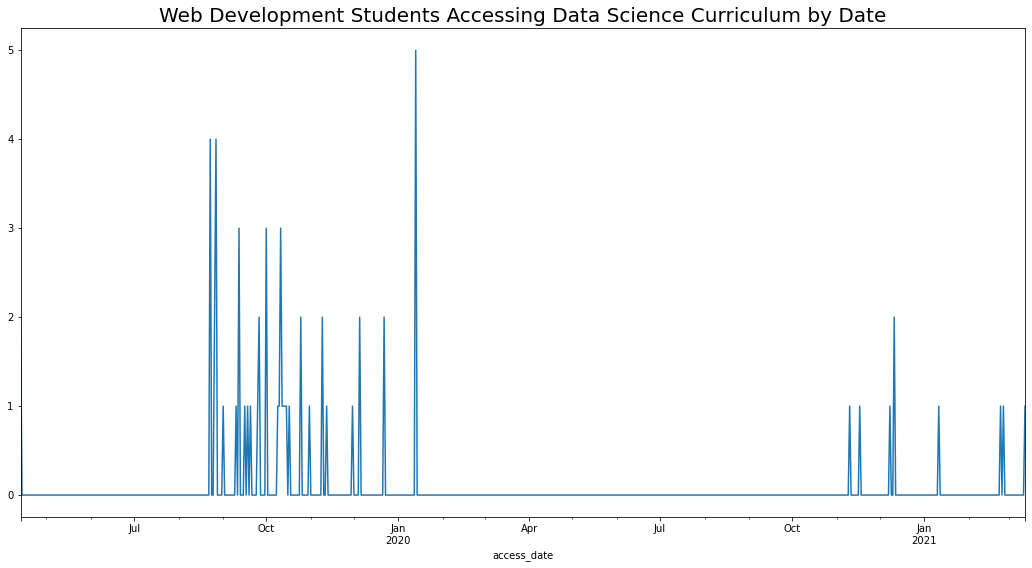

In [255]:
plt.figure(figsize = (18, 9))
daily_wd_to_ds_access.program_id.plot()
plt.title('Web Development Students Accessing Data Science Curriculum by Date', fontsize=20)
plt.show()

In [256]:
wd_to_ds_access.groupby(wd_to_ds_access.user_id).count()

date  time  path  ip  name  start_date  end_date  program_id  hour
user_id                                                                    
18          5     5     5   5     5           5         5           5     5
20          6     6     6   6     6           6         6           6     6
41          6     6     6   6     6           6         6           6     6
53          1     1     1   1     1           1         1           1     1
94          2     2     2   2     2           2         2           2     2
124         2     2     2   2     2           2         2           2     2
138         1     1     1   1     1           1         1           1     1
143         1     1     1   1     1           1         1           1     1
171         1     1     1   1     1           1         1           1     1
201         3     3     3   3     3           3         3           3     3
220         2     2     2   2     2           2         2           2     2
249         3     3     3   3     3           3         3           3     3
373         2     2     2   2     2           2         2           2     2
410         8     8     8   8     8           8         8           8     8
417         1     1     1   1     1           1         1           1     1
423         1     1     1   1     1           1         1           1     1
433         1     1     1   1     1           1         1           1     1
450         4     4     4   4     4           4         4           4     4
451         1     1     1   1     1           1         1           1     1
458         1     1     1   1     1           1         1           1     1
495         1     1     1   1     1           1         1           1     1
513         7     7     7   7     7           7         7           7     7
790         1     1     1   1     1           1         1           1     1

In [257]:
df[(df.user_id==513)]
# this user only accessed the curriculum after graduation? 13 times with a mix of ds and wb views

date      time  \
access_date                                 
2019-10-11 12:11:24  2019-10-11  12:11:24   
2019-10-11 12:19:14  2019-10-11  12:19:14   
2019-10-11 12:19:38  2019-10-11  12:19:38   
2019-10-11 17:32:00  2019-10-11  17:32:00   
2019-10-11 17:32:17  2019-10-11  17:32:17   
2019-10-12 02:22:42  2019-10-12  02:22:42   
2019-10-12 02:22:42  2019-10-12  02:22:42   
2019-10-13 22:15:41  2019-10-13  22:15:41   
2019-10-14 02:01:56  2019-10-14  02:01:56   
2019-10-14 09:53:06  2019-10-14  09:53:06   
2019-10-25 01:46:43  2019-10-25  01:46:43   
2019-10-25 12:58:53  2019-10-25  12:58:53   
2019-10-31 22:49:44  2019-10-31  22:49:44   

                                                         path  user_id  \
access_date                                                              
2019-10-11 12:11:24                                     login      513   
2019-10-11 12:19:14                            html-css/forms      513   
2019-10-11 12:19:38               javascript-i/coffee-project      513   
2019-10-11 17:32:00                                    java-i      513   
2019-10-11 17:32:17  1-fundamentals/1.1-intro-to-data-science      513   
2019-10-12 02:22:42                                    java-i      513   
2019-10-12 02:22:42  1-fundamentals/1.1-intro-to-data-science      513   
2019-10-13 22:15:41  1-fundamentals/1.1-intro-to-data-science      513   
2019-10-14 02:01:56                                    java-i      513   
2019-10-14 09:53:06  1-fundamentals/1.1-intro-to-data-science      513   
2019-10-25 01:46:43  1-fundamentals/1.1-intro-to-data-science      513   
2019-10-25 12:58:53  1-fundamentals/1.1-intro-to-data-science      513   
2019-10-31 22:49:44  1-fundamentals/1.1-intro-to-data-science      513   

                                  ip     name start_date   end_date  \
access_date                                                           
2019-10-11 12:11:24     74.81.88.162  Glacier 2015-06-05 2015-10-06   
2019-10-11 12:19:14     74.81.88.162  Glacier 2015-06-05 2015-10-06   
2019-10-11 12:19:38     74.81.88.162  Glacier 2015-06-05 2015-10-06   
2019-10-11 17:32:00    66.25.130.242  Glacier 2015-06-05 2015-10-06   
2019-10-11 17:32:17    66.25.130.242  Glacier 2015-06-05 2015-10-06   
2019-10-12 02:22:42  173.239.232.166  Glacier 2015-06-05 2015-10-06   
2019-10-12 02:22:42  173.239.232.166  Glacier 2015-06-05 2015-10-06   
2019-10-13 22:15:41    66.25.130.242  Glacier 2015-06-05 2015-10-06   
2019-10-14 02:01:56   173.239.232.12  Glacier 2015-06-05 2015-10-06   
2019-10-14 09:53:06   173.239.232.12  Glacier 2015-06-05 2015-10-06   
2019-10-25 01:46:43  173.239.232.172  Glacier 2015-06-05 2015-10-06   
2019-10-25 12:58:53      74.81.88.18  Glacier 2015-06-05 2015-10-06   
2019-10-31 22:49:44    66.25.130.242  Glacier 2015-06-05 2015-10-06   

                          program_id  hour  
access_date                                 
2019-10-11 12:11:24  Web Development    12  
2019-10-11 12:19:14  Web Development    12  
2019-10-11 12:19:38  Web Development    12  
2019-10-11 17:32:00  Web Development    17  
2019-10-11 17:32:17  Web Development    17  
2019-10-12 02:22:42  Web Development     2  
2019-10-12 02:22:42  Web Development     2  
2019-10-13 22:15:41  Web Development    22  
2019-10-14 02:01:56  Web Development     2  
2019-10-14 09:53:06  Web Development     9  
2019-10-25 01:46:43  Web Development     1  
2019-10-25 12:58:53  Web Development    12  
2019-10-31 22:49:44  Web Development    22

In [258]:
wd_to_ds_access.groupby(wd_to_ds_access.name).count()

date  time  path  user_id  ip  start_date  end_date  program_id  \
name                                                                          
Andromeda      2     2     2        2   2           2         2           2   
Betelgeuse    10    10    10       10  10          10        10          10   
Ceres          7     7     7        7   7           7         7           7   
Deimos         1     1     1        1   1           1         1           1   
Glacier        7     7     7        7   7           7         7           7   
Kalypso        1     1     1        1   1           1         1           1   
Lassen         1     1     1        1   1           1         1           1   
Niagara        1     1     1        1   1           1         1           1   
Quincy         2     2     2        2   2           2         2           2   
Sequoia        6     6     6        6   6           6         6           6   
Teddy         12    12    12       12  12          12        12          12   
Ulysses        3     3     3        3   3           3         3           3   
Voyageurs      6     6     6        6   6           6         6           6   
Wrangell       2     2     2        2   2           2         2           2   

            hour  
name              
Andromeda      2  
Betelgeuse    10  
Ceres          7  
Deimos         1  
Glacier        7  
Kalypso        1  
Lassen         1  
Niagara        1  
Quincy         2  
Sequoia        6  
Teddy         12  
Ulysses        3  
Voyageurs      6  
Wrangell       2

In [259]:
wd_access_by_cohort = wd_to_ds_access.groupby(wd_to_ds_access.name).count()

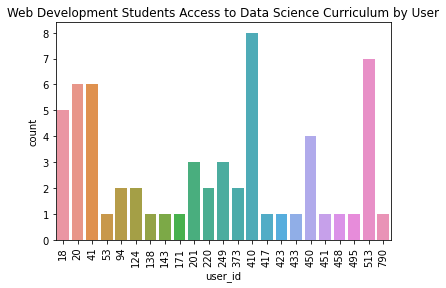

In [260]:
sns.countplot(data=wd_to_ds_access, x=wd_to_ds_access.user_id)
plt.title('Web Development Students Access to Data Science Curriculum by User')
plt.xticks(rotation=90)
plt.show()

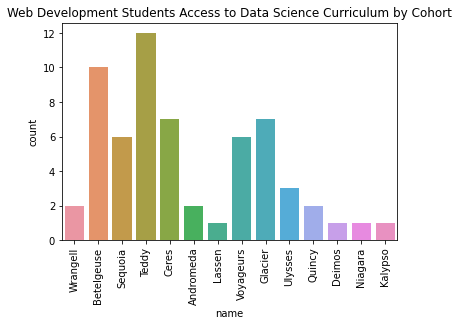

In [261]:
sns.countplot(data=wd_to_ds_access, x=wd_to_ds_access.name)
plt.title('Web Development Students Access to Data Science Curriculum by Cohort')
plt.xticks(rotation=90)
plt.show()

#### Data Science Students Accessing Web Development Curriculumn

In [262]:
ds.head()

date      time  \
access_date                                 
2019-08-20 09:40:28  2019-08-20  09:40:28   
2019-08-20 09:40:30  2019-08-20  09:40:30   
2019-08-20 09:41:02  2019-08-20  09:41:02   
2019-08-20 09:41:28  2019-08-20  09:41:28   
2019-08-20 09:41:36  2019-08-20  09:41:36   

                                                         path  user_id  \
access_date                                                              
2019-08-20 09:40:28                    3-sql/1-mysql-overview      470   
2019-08-20 09:40:30                 2-storytelling/bad-charts      467   
2019-08-20 09:41:02  1-fundamentals/1.1-intro-to-data-science      469   
2019-08-20 09:41:28  1-fundamentals/1.1-intro-to-data-science      480   
2019-08-20 09:41:36  1-fundamentals/1.1-intro-to-data-science      482   

                               ip   name start_date   end_date    program_id  \
access_date                                                                    
2019-08-20 09:40:28  97.105.19.58  Bayes 2019-08-19 2020-01-30  Data Science   
2019-08-20 09:40:30  97.105.19.58  Bayes 2019-08-19 2020-01-30  Data Science   
2019-08-20 09:41:02  97.105.19.58  Bayes 2019-08-19 2020-01-30  Data Science   
2019-08-20 09:41:28  97.105.19.58  Bayes 2019-08-19 2020-01-30  Data Science   
2019-08-20 09:41:36  97.105.19.58  Bayes 2019-08-19 2020-01-30  Data Science   

                     hour  
access_date                
2019-08-20 09:40:28     9  
2019-08-20 09:40:30     9  
2019-08-20 09:41:02     9  
2019-08-20 09:41:28     9  
2019-08-20 09:41:36     9

In [263]:
ds.isna().sum()

date          0
time          0
path          1
user_id       0
ip            0
name          0
start_date    0
end_date      0
program_id    0
hour          0
dtype: int64

In [264]:
ds=ds.dropna()

In [265]:
# determine what a web development course is (possibly update when path is parsed?)
ds_to_wd_access=ds[ds.path.str.contains('java')]
ds_to_wd_access

date      time  \
access_date                                 
2019-09-23 11:45:09  2019-09-23  11:45:09   
2019-09-25 19:30:44  2019-09-25  19:30:44   
2019-09-25 19:31:07  2019-09-25  19:31:07   
2019-09-25 19:31:11  2019-09-25  19:31:11   
2019-09-25 19:31:12  2019-09-25  19:31:12   
2019-09-25 19:31:14  2019-09-25  19:31:14   
2019-09-25 19:31:19  2019-09-25  19:31:19   
2019-09-25 19:32:23  2019-09-25  19:32:23   
2019-09-25 19:32:34  2019-09-25  19:32:34   
2019-09-25 19:32:38  2019-09-25  19:32:38   
2019-09-25 19:32:44  2019-09-25  19:32:44   
2019-11-25 14:26:14  2019-11-25  14:26:14   
2019-11-25 14:26:16  2019-11-25  14:26:16   
2019-11-25 14:26:17  2019-11-25  14:26:17   
2019-11-25 14:26:18  2019-11-25  14:26:18   
2019-11-25 14:26:20  2019-11-25  14:26:20   
2019-11-25 14:26:24  2019-11-25  14:26:24   
2019-11-26 10:31:16  2019-11-26  10:31:16   
2019-11-26 10:37:35  2019-11-26  10:37:35   
2019-11-26 10:37:39  2019-11-26  10:37:39   
2019-11-26 10:38:06  2019-11-26  10:38:06   
2019-11-26 10:55:05  2019-11-26  10:55:05   
2019-11-26 15:32:05  2019-11-26  15:32:05   
2019-12-03 10:04:40  2019-12-03  10:04:40   
2019-12-03 10:04:48  2019-12-03  10:04:48   
2019-12-03 10:04:48  2019-12-03  10:04:48   
2019-12-03 10:04:49  2019-12-03  10:04:49   
2019-12-03 10:05:25  2019-12-03  10:05:25   
2019-12-03 11:49:29  2019-12-03  11:49:29   
2019-12-03 11:49:33  2019-12-03  11:49:33   
2019-12-03 11:49:35  2019-12-03  11:49:35   
2019-12-14 16:46:24  2019-12-14  16:46:24   
2020-05-19 16:03:32  2020-05-19  16:03:32   

                                                    path  user_id  \
access_date                                                         
2019-09-23 11:45:09                             java-iii      476   
2019-09-25 19:30:44                         javascript-i      476   
2019-09-25 19:31:07                         javascript-i      476   
2019-09-25 19:31:11                               java-i      476   
2019-09-25 19:31:12                         javascript-i      476   
2019-09-25 19:31:14                               java-i      476   
2019-09-25 19:31:19                              java-ii      476   
2019-09-25 19:32:23                         javascript-i      476   
2019-09-25 19:32:34                               java-i      476   
2019-09-25 19:32:38                               java-i      476   
2019-09-25 19:32:44                    java-i/console-io      476   
2019-11-25 14:26:14                         javascript-i      476   
2019-11-25 14:26:16                        javascript-ii      476   
2019-11-25 14:26:17                               java-i      476   
2019-11-25 14:26:18                              java-ii      476   
2019-11-25 14:26:20                             java-iii      476   
2019-11-25 14:26:24                             java-iii      476   
2019-11-26 10:31:16         javascript-i/bom-and-dom/dom      467   
2019-11-26 10:37:35                         javascript-i      476   
2019-11-26 10:37:39                        javascript-ii      476   
2019-11-26 10:38:06                               java-i      476   
2019-11-26 10:55:05                         javascript-i      476   
2019-11-26 15:32:05            javascript-i/conditionals      472   
2019-12-03 10:04:40                         javascript-i      467   
2019-12-03 10:04:48                        javascript-ii      467   
2019-12-03 10:04:48                               java-i      467   
2019-12-03 10:04:49                              java-ii      467   
2019-12-03 10:05:25                             java-iii      467   
2019-12-03 11:49:29                         javascript-i      467   
2019-12-03 11:49:33                        javascript-ii      467   
2019-12-03 11:49:35                              java-ii      467   
2019-12-14 16:46:24                         javascript-i      476   
2020-05-19 16:03:32  java-ii/object-oriented-programming      590   

                                ip 

In [266]:
daily_ds_to_wd_access=ds_to_wd_access.resample('D').count()
daily_ds_to_wd_access

date  time  path  user_id  ip  name  start_date  end_date  \
access_date                                                              
2019-09-23      1     1     1        1   1     1           1         1   
2019-09-24      0     0     0        0   0     0           0         0   
2019-09-25     10    10    10       10  10    10          10        10   
2019-09-26      0     0     0        0   0     0           0         0   
2019-09-27      0     0     0        0   0     0           0         0   
2019-09-28      0     0     0        0   0     0           0         0   
2019-09-29      0     0     0        0   0     0           0         0   
2019-09-30      0     0     0        0   0     0           0         0   
2019-10-01      0     0     0        0   0     0           0         0   
2019-10-02      0     0     0        0   0     0           0         0   
2019-10-03      0     0     0        0   0     0           0         0   
2019-10-04      0     0     0        0   0     0           0         0   
2019-10-05      0     0     0        0   0     0           0         0   
2019-10-06      0     0     0        0   0     0           0         0   
2019-10-07      0     0     0        0   0     0           0         0   
2019-10-08      0     0     0        0   0     0           0         0   
2019-10-09      0     0     0        0   0     0           0         0   
2019-10-10      0     0     0        0   0     0           0         0   
2019-10-11      0     0     0        0   0     0           0         0   
2019-10-12      0     0     0        0   0     0           0         0   
2019-10-13      0     0     0        0   0     0           0         0   
2019-10-14      0     0     0        0   0     0           0         0   
2019-10-15      0     0     0        0   0     0           0         0   
2019-10-16      0     0     0        0   0     0           0         0   
2019-10-17      0     0     0        0   0     0           0         0   
2019-10-18      0     0     0        0   0     0           0         0   
2019-10-19      0     0     0        0   0     0           0         0   
2019-10-20      0     0     0        0   0     0           0         0   
2019-10-21      0     0     0        0   0     0           0         0   
2019-10-22      0     0     0        0   0     0           0         0   
2019-10-23      0     0     0        0   0     0           0         0   
2019-10-24      0     0     0        0   0     0           0         0   
2019-10-25      0     0     0        0   0     0           0         0   
2019-10-26      0     0     0        0   0     0           0         0   
2019-10-27      0     0     0        0   0     0           0         0   
2019-10-28      0     0     0        0   0     0           0         0   
2019-10-29      0     0     0        0   0     0           0         0   
2019-10-30      0     0     0        0   0     0           0         0   
2019-10-31      0     0     0        0   0     0           0         0   
2019-11-01      0     0     0        0   0     0           0         0   
2019-11-02      0     0     0        0   0     0           0         0   
2019-11-03      0     0     0        0   0     0           0         0   
2019-11-04      0     0     0        0   0     0           0         0   
2019-11-05      0     0     0        0   0     0           0         0   
2019-11-06      0     0     0        0   0     0           0         0   
2019-11-07      0     0     0        0   0     0           0         0   
2019-11-08      0     0     0        0   0     0           0         0   
2019-11-09      0     0     0        0   0     0           0         0   
2019-11-10      0     0     0        0   0     0           0         0   
2019-11-11      0     0     0        0   0     0           0         0   
2019-11-12      0     0     0        0   0     0           0         0   
2019-11-13      0     0     0        0   0     0           0         0   
2019-11-14      0

Text(0.5, 1.0, 'Data Science Students Accessing Web Development Curriculum by Date')

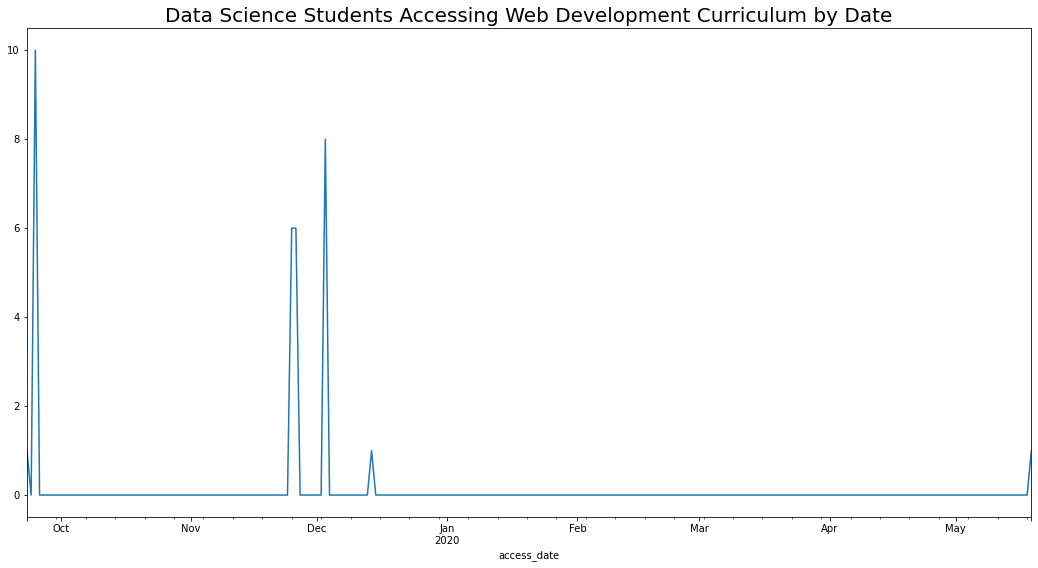

In [267]:
plt.figure(figsize = (18, 9))
daily_ds_to_wd_access.program_id.plot()
plt.title('Data Science Students Accessing Web Development Curriculum by Date', fontsize=20)

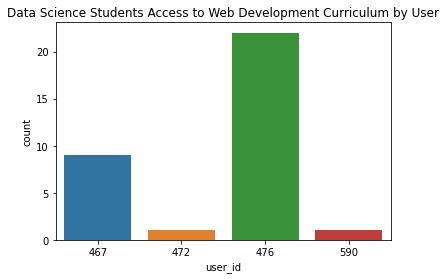

In [268]:
sns.countplot(data=ds_to_wd_access, x=ds_to_wd_access.user_id)
plt.title('Data Science Students Access to Web Development Curriculum by User')
plt.show()

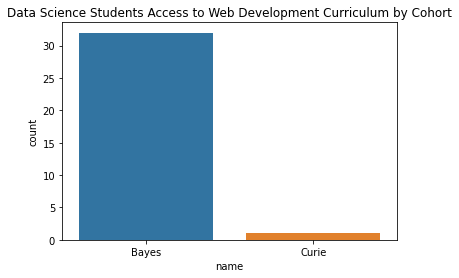

In [269]:
sns.countplot(data=ds_to_wd_access, x=ds_to_wd_access.name)
plt.title('Data Science Students Access to Web Development Curriculum by Cohort')
plt.show()

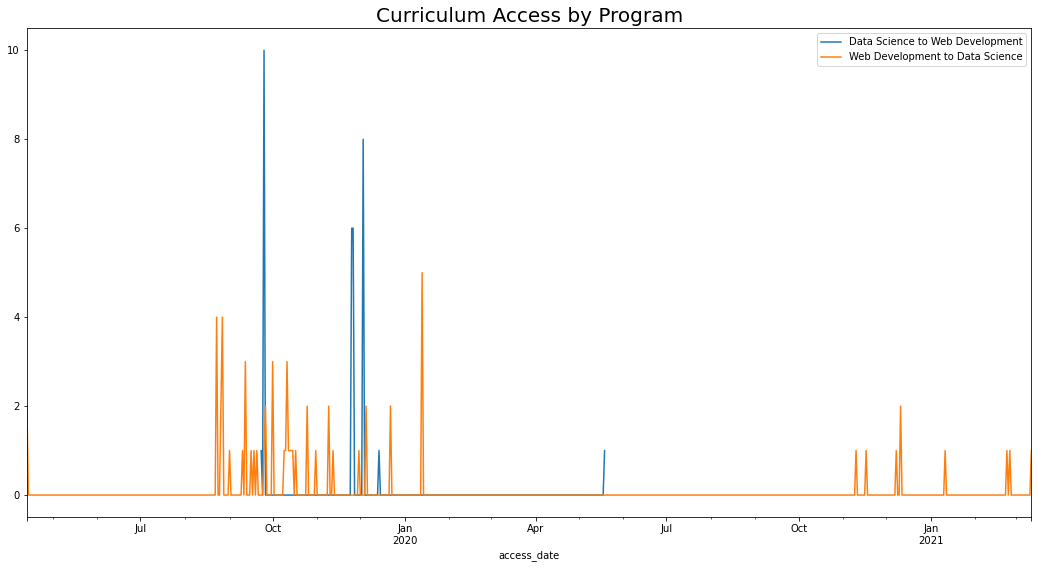

In [270]:
plt.figure(figsize = (18, 9))
daily_ds_to_wd_access.program_id.plot(label='Data Science to Web Development')
daily_wd_to_ds_access.program_id.plot(label='Web Development to Data Science')
plt.title('Curriculum Access by Program', fontsize=20)
plt.legend()
plt.show()

**The majority of data science students accessing web development courses ends in 2019, with one access in May 2020. Web development students accessing data science continues through January 2020 and then flatlines until November 2020 and continues until the end of the dataset.**

In [291]:
Hampton=wd[wd.name=='Hampton']
Teddy=wd[wd.name=='Teddy']
Arches=wd[wd.name=='Arches']
Sequoia=wd[wd.name=='Sequoia']
Niagara=wd[wd.name=='Niagara']
Pinnacles=wd[wd.name=='Pinnacles']
Quincy=wd[wd.name=='Quincy']
Kings=wd[wd.name=='Kings']
Lassen=wd[wd.name=='Lassen']
Mammoth=wd[wd.name=='Mammoth']
Glacier=wd[wd.name=='Glacier']
Denali=wd[wd.name=='Denali']
Joshua=wd[wd.name=='Joshua']
Olympic=wd[wd.name=='Olympic']
Ulysses=wd[wd.name=='Ulysses']
Badlands=wd[wd.name=='Badlands']
Ike=wd[wd.name=='Ike']
Voyageurs=wd[wd.name=='Voyageurs']
Wrangell=wd[wd.name=='Wrangell']
Xanadu=wd[wd.name=='Xanadu']
Franklin=wd[wd.name=='Franklin']
Yosemite=wd[wd.name=='Yosemite']
Zion=wd[wd.name=='Zion']
Andromeda=wd[wd.name=='Andromeda']
Betelgeuse=wd[wd.name=='Betelgeuse']
Ceres=wd[wd.name=='Ceres']
Deimos=wd[wd.name=='Deimos']
Europa=wd[wd.name=='Europa']
Fortuna=wd[wd.name=='Fortuna']
Apex=wd[wd.name=='Apex']
Ganymede=wd[wd.name=='Ganymede']
Hyperion=wd[wd.name=='Hyperion']
Bash=wd[wd.name=='Bash']
Jupiter=wd[wd.name=='Jupiter']
Kalypso=wd[wd.name=='Kalypso']
Luna=wd[wd.name=='Luna']
Marco=wd[wd.name=='Marco']
Neptune=wd[wd.name=='Neptune']
Oberon=wd[wd.name=='Oberon']


In [271]:
wd.name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Ike', 'Voyageurs',
       'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Zion', 'Andromeda',
       'Betelgeuse', 'Ceres', 'Deimos', 'Europa', 'Fortuna', 'Apex',
       'Ganymede', 'Hyperion', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Marco', 'Neptune', 'Oberon'], dtype=object)

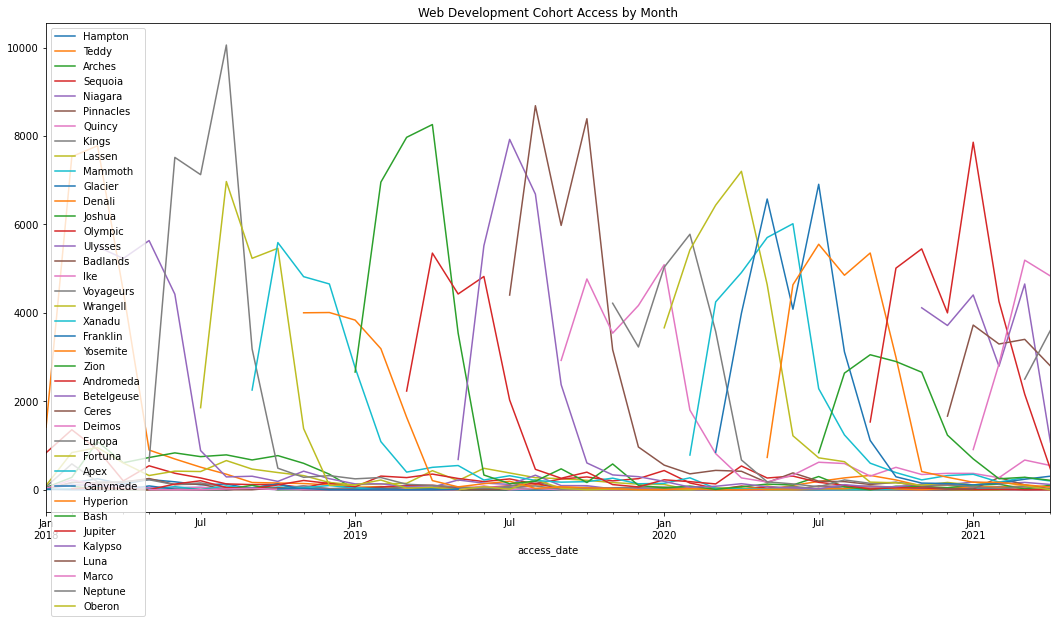

In [296]:
plt.figure(figsize = (18, 9))
Hampton.path.resample('M').count().plot(label='Hampton')
Teddy.path.resample('M').count().plot(label='Teddy')
Arches.path.resample('M').count().plot(label='Arches')
Sequoia.path.resample('M').count().plot(label='Sequoia')
Niagara.path.resample('M').count().plot(label='Niagara')
Pinnacles.path.resample('M').count().plot(label='Pinnacles')
Quincy.path.resample('M').count().plot(label='Quincy')
Kings.path.resample('M').count().plot(label='Kings')
Lassen.path.resample('M').count().plot(label='Lassen')
Mammoth.path.resample('M').count().plot(label='Mammoth')
Glacier.path.resample('M').count().plot(label='Glacier')
Denali.path.resample('M').count().plot(label='Denali')
Joshua.path.resample('M').count().plot(label='Joshua')
Olympic.path.resample('M').count().plot(label='Olympic')
Ulysses.path.resample('M').count().plot(label='Ulysses')
Badlands.path.resample('M').count().plot(label='Badlands')
Ike.path.resample('M').count().plot(label='Ike')
Voyageurs.path.resample('M').count().plot(label='Voyageurs')
Wrangell.path.resample('M').count().plot(label='Wrangell')
Xanadu.path.resample('M').count().plot(label='Xanadu')
Franklin.path.resample('M').count().plot(label='Franklin')
Yosemite.path.resample('M').count().plot(label='Yosemite')
Zion.path.resample('M').count().plot(label='Zion')
Andromeda.path.resample('M').count().plot(label='Andromeda')
Betelgeuse.path.resample('M').count().plot(label='Betelgeuse')
Ceres.path.resample('M').count().plot(label='Ceres')
Deimos.path.resample('M').count().plot(label='Deimos')
Europa.path.resample('M').count().plot(label='Europa')
Fortuna.path.resample('M').count().plot(label='Fortuna')
Apex.path.resample('M').count().plot(label='Apex')
Ganymede.path.resample('M').count().plot(label='Ganymede')
Hyperion.path.resample('M').count().plot(label='Hyperion')
Bash.path.resample('M').count().plot(label='Bash')
Jupiter.path.resample('M').count().plot(label='Jupiter')
Kalypso.path.resample('M').count().plot(label='Kalypso')
Luna.path.resample('M').count().plot(label='Luna')
Marco.path.resample('M').count().plot(label='Marco')
Neptune.path.resample('M').count().plot(label='Neptune')
Oberon.path.resample('M').count().plot(label='Oberon')
plt.title('Web Development Cohort Access by Month')
plt.legend()
plt.show()

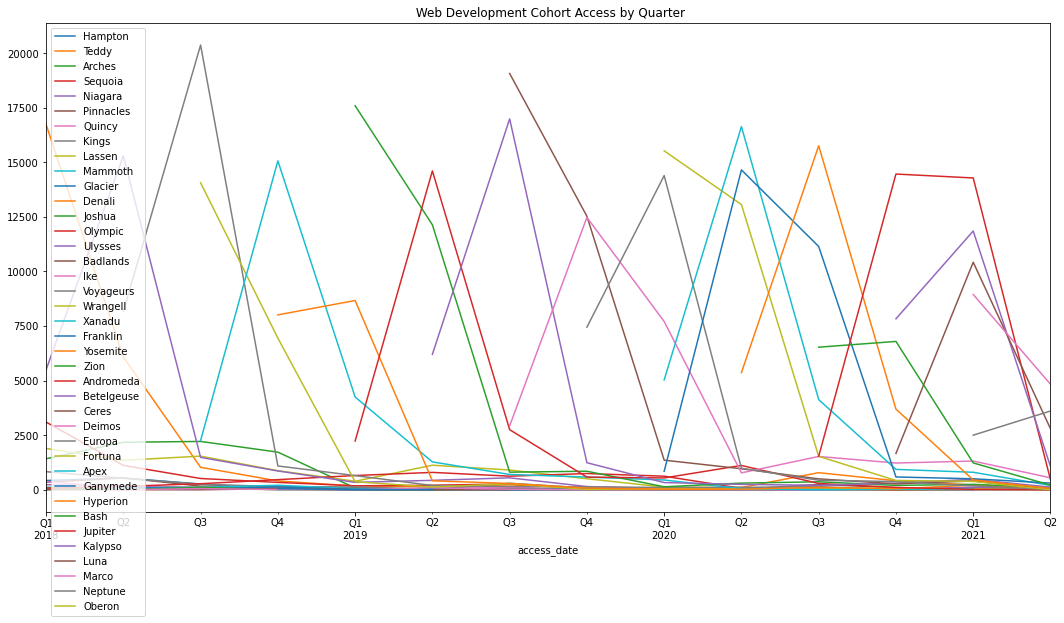

In [295]:
plt.figure(figsize = (18, 9))
Hampton.path.resample('Q').count().plot(label='Hampton')
Teddy.path.resample('Q').count().plot(label='Teddy')
Arches.path.resample('Q').count().plot(label='Arches')
Sequoia.path.resample('Q').count().plot(label='Sequoia')
Niagara.path.resample('Q').count().plot(label='Niagara')
Pinnacles.path.resample('Q').count().plot(label='Pinnacles')
Quincy.path.resample('Q').count().plot(label='Quincy')
Kings.path.resample('Q').count().plot(label='Kings')
Lassen.path.resample('Q').count().plot(label='Lassen')
Mammoth.path.resample('Q').count().plot(label='Mammoth')
Glacier.path.resample('Q').count().plot(label='Glacier')
Denali.path.resample('Q').count().plot(label='Denali')
Joshua.path.resample('Q').count().plot(label='Joshua')
Olympic.path.resample('Q').count().plot(label='Olympic')
Ulysses.path.resample('Q').count().plot(label='Ulysses')
Badlands.path.resample('Q').count().plot(label='Badlands')
Ike.path.resample('Q').count().plot(label='Ike')
Voyageurs.path.resample('Q').count().plot(label='Voyageurs')
Wrangell.path.resample('Q').count().plot(label='Wrangell')
Xanadu.path.resample('Q').count().plot(label='Xanadu')
Franklin.path.resample('Q').count().plot(label='Franklin')
Yosemite.path.resample('Q').count().plot(label='Yosemite')
Zion.path.resample('Q').count().plot(label='Zion')
Andromeda.path.resample('Q').count().plot(label='Andromeda')
Betelgeuse.path.resample('Q').count().plot(label='Betelgeuse')
Ceres.path.resample('Q').count().plot(label='Ceres')
Deimos.path.resample('Q').count().plot(label='Deimos')
Europa.path.resample('Q').count().plot(label='Europa')
Fortuna.path.resample('Q').count().plot(label='Fortuna')
Apex.path.resample('Q').count().plot(label='Apex')
Ganymede.path.resample('Q').count().plot(label='Ganymede')
Hyperion.path.resample('Q').count().plot(label='Hyperion')
Bash.path.resample('Q').count().plot(label='Bash')
Jupiter.path.resample('Q').count().plot(label='Jupiter')
Kalypso.path.resample('Q').count().plot(label='Kalypso')
Luna.path.resample('Q').count().plot(label='Luna')
Marco.path.resample('Q').count().plot(label='Marco')
Neptune.path.resample('Q').count().plot(label='Neptune')
Oberon.path.resample('Q').count().plot(label='Oberon')
plt.title(' Web Development Cohort Access by Quarter')
plt.legend()
plt.show()